We study Table 13.2 on p240 of Lange and Chapter 13 Question 11 (p240) and Chapter 14, Example 14.10.1 (p264).

The table contains counts of the number of days a given number of deaths occurred. 

In [1]:
import numpy as np
freq = np.array([162,267,271,185,111,61,27,8,3,1])
deaths = np.arange(10)

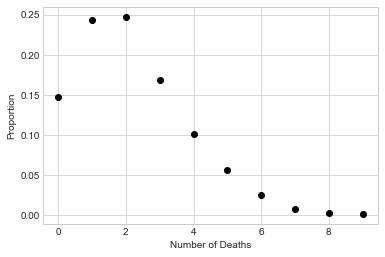

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

## proportion of different number of deaths
plt.plot(np.arange(freq.size), freq/np.sum(freq), 'o', color='black')
plt.xlabel("Number of Deaths")
plt.ylabel("Proportion");

## Problem 1

Confirm Lange's claim in question 11 that "A Poisson distribution gives a poor fit to these data . . ." by computing the MLE of the Poisson parameter $\lambda$ (this should be done by hand using calculus) and plotting the resulting probability mass function over the observed data. They should be a bit discrepant (thus justifying the claim).

### Answer 1

$f(x_i, \theta) = \frac {\theta^{x_i}{e^{-\theta}}}{x_i !}$   ----------> Poission Probability Mass distribution

Maximum Likelihood Estimation
$L(\theta) = {\displaystyle\prod_{i=1}^{n} \frac {\theta^{x_i}{e^{-\theta}}}{x_i !}}$

Taking natural log on both side, we get, 

$ln(L(\theta)) = ln \bigg({\displaystyle\prod_{i=1}^{n} \frac {\theta^{x_i}{e^{-\theta}}}{x_i !}}\bigg)$

$ln(L(\theta)) = ln\big(\theta^{\sum_{i=1}^{n} x_i}\big) + ln\big(e^{-\sum_{i=1}^{n} \theta}\big) - {\displaystyle\sum_{i=1}^{n} ln\big(x_i !\big)} $ 

Differentiate with respect to $\theta$ to maximize the log function of $ln(L(\theta))$

$\frac{\partial \big(ln(L(\theta)\big)}{\partial\theta} = \frac {\sum_{i=1}^{n} x_i }{\theta} - n - 0  = 0 $

$\theta = \frac {\sum_{i=1}^{n} x_i}{n}$

$\theta = \bar {X} $

$\theta = \frac {162\times0 + 267\times1 + 271\times2+185\times3+111\times4+61\times5+27\times6+8\times7+3+1}{10}$

$\theta = \frac {1096}{10}$

$\theta = 109.6 $

Thus we have an estimate of $\lambda$ as $\theta = 109.6$



In [3]:
import math 
def poission(lmda,num):
    pmf = []
    cls = np.arange(num)
    for i in range(num):
        x = cls[i] 
        f = (((lmda)**x)*np.exp(-(lmda)))/ math.factorial(x)
        pmf.append(f)
    return pmf

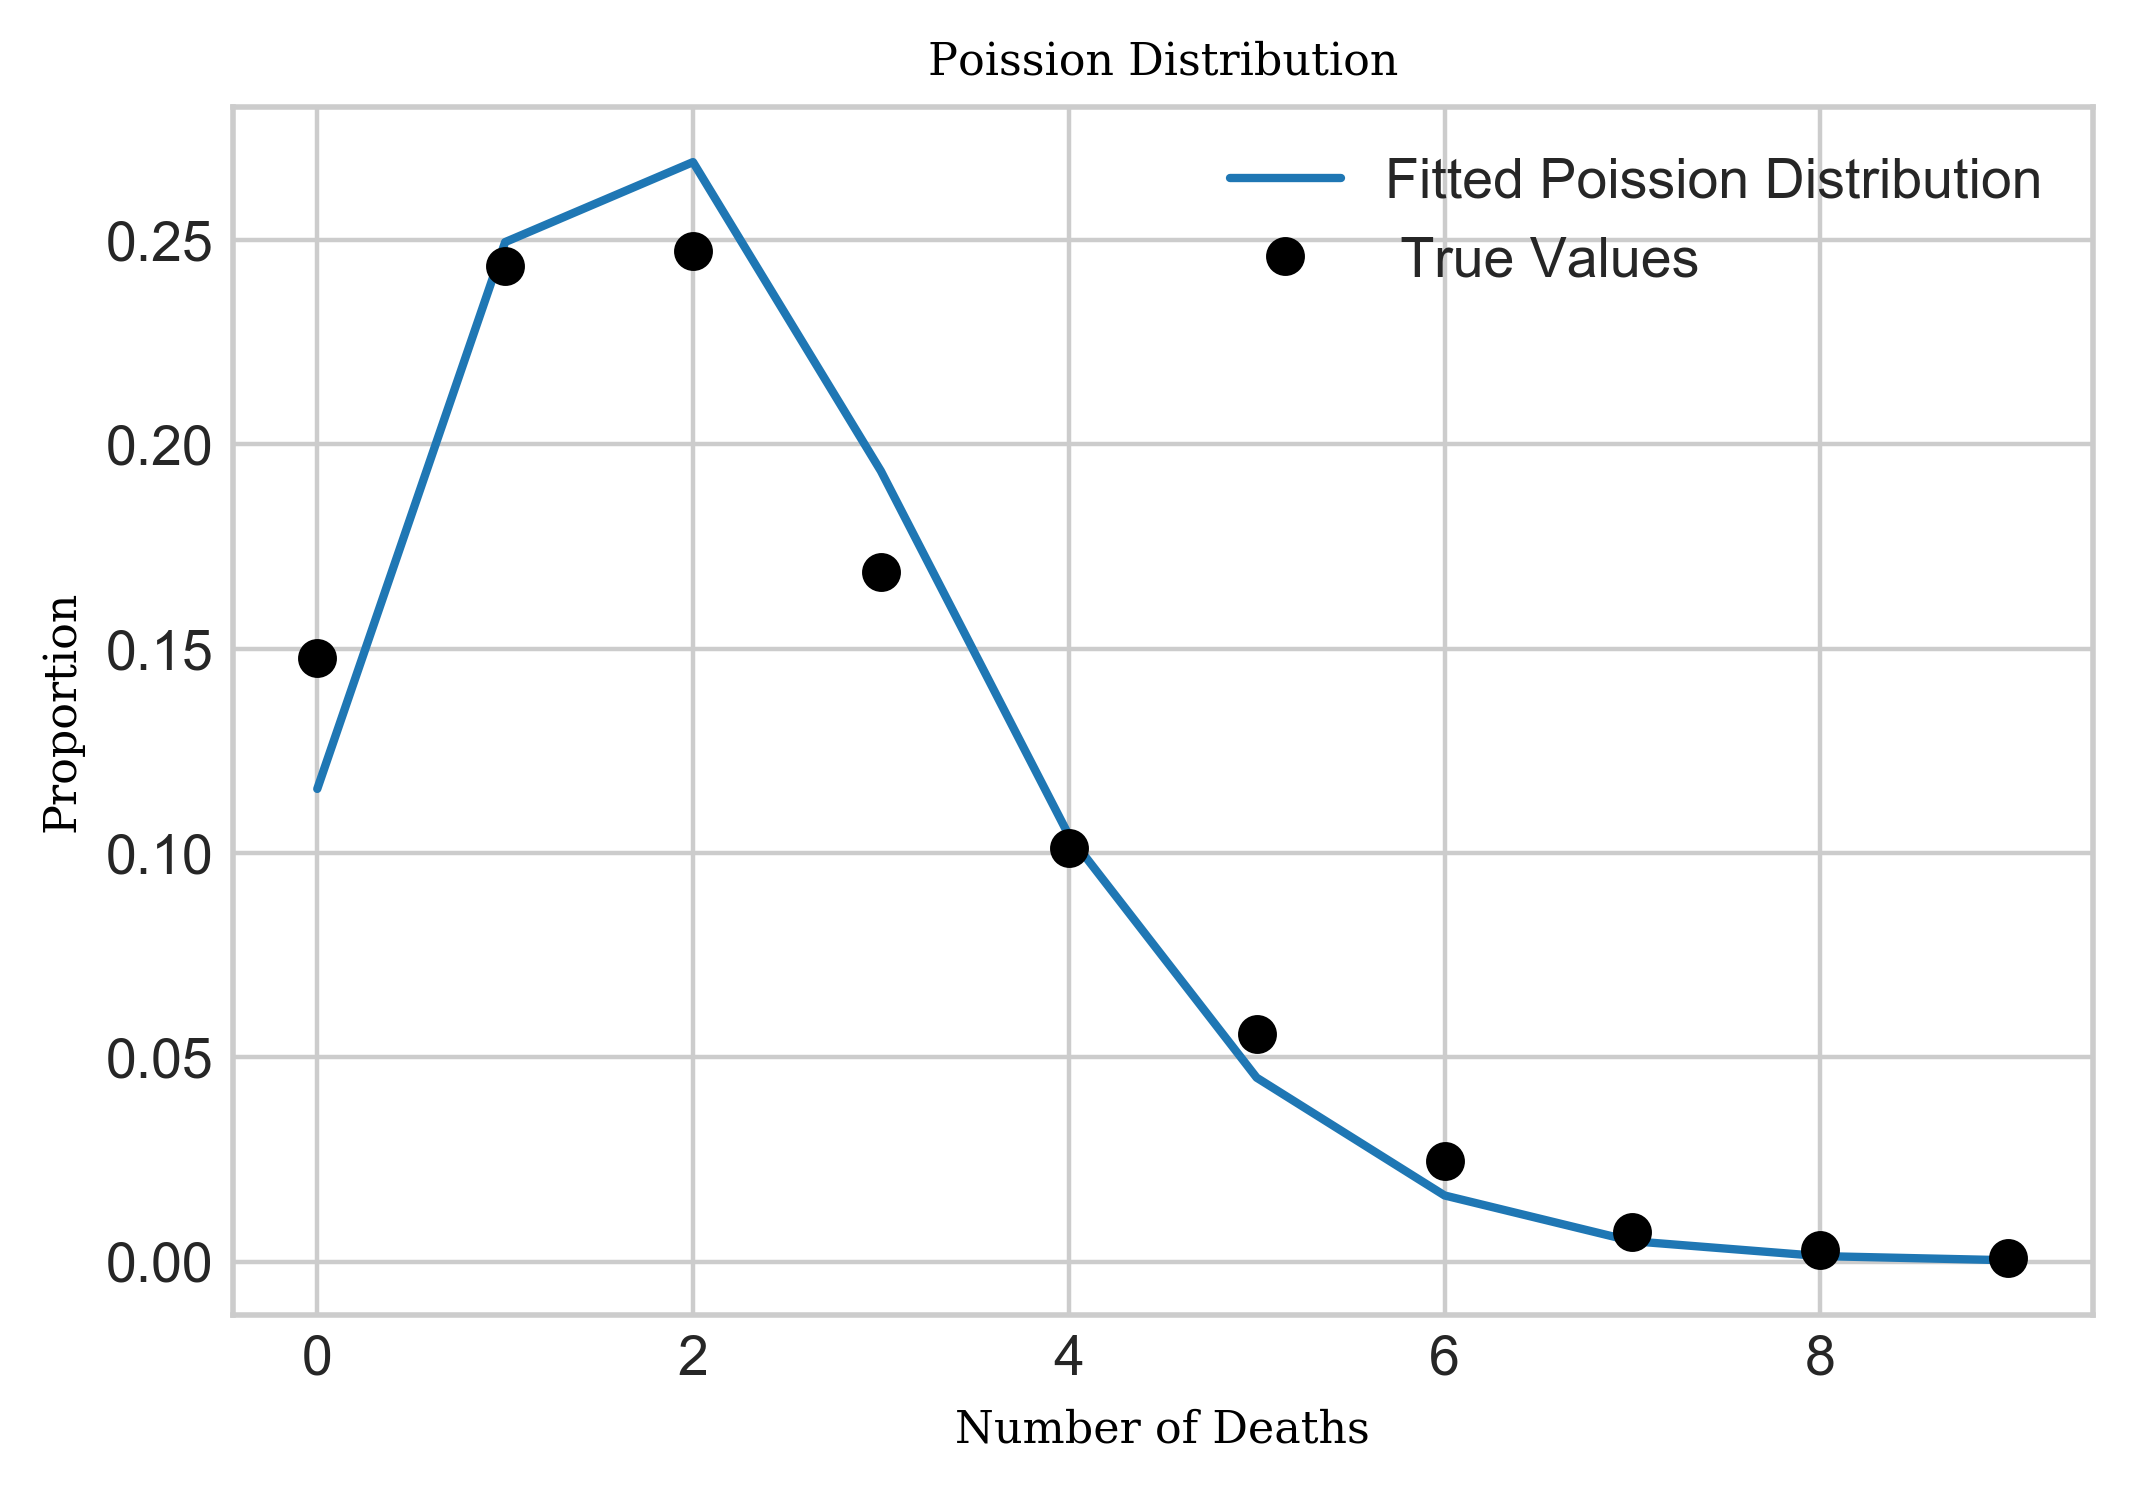

In [4]:
mle_poission = poission(2.157, 10)
from matplotlib.pyplot import figure
figure(num=None, figsize=(6, 4), dpi=400, facecolor='w', edgecolor='k')
font = {'family': 'serif','color':  'black','weight': 'normal', 'size': 8,}
plt.plot(np.arange(10), mle_poission, label= "Fitted Poission Distribution")
plt.plot(np.arange(freq.size), freq/np.sum(freq), 'o', color='black', label= " True Values")
plt.xlabel("Number of Deaths", fontdict= font)
plt.ylabel("Proportion", fontdict= font)
plt.title("Poission Distribution", fontdict= font)
plt.legend();

#### The fitted poission distribution is slightly discrepant to the actual data. The estimated parameter is calculated by assuming that the data points are obtained from a single poission dustribution. It may be possible that this might be taken from the mixture of two poission distribution.

## Problem 2

Fit the $\alpha$, $\mu_1$ and $\mu_2$ parameters for the mixture of two Poissons model proposed in Question 11 using a gradient ascent algorithm. You must write your own fitting code (you cannot use `scipy optimize` or R `optim`). Discuss how you select starting parameters and monitor convergence. Include a plot to illustrate the convergence for different starting values of the parameters. You can confirm your results by also using Python or R built in optimizers.

### Answer 2
$L(\alpha, \mu_1, \mu_2) = {\displaystyle\prod_{i=0}^{9} \bigg[\alpha e^{-\mu_1} \frac{\mu_1^i}{i!} + (1-\alpha) e^{-\mu_2} \frac{\mu_2^i}{i!} \bigg]^{n_i}}$

$f = ln(L(\alpha, \mu_1, \mu_2)) = {\displaystyle\sum_{i=0}^{9} n_i ln}\bigg[\alpha e^{-\mu_1} \frac{\mu_1^i}{i!} + (1-\alpha) e^{-\mu_2} \frac{\mu_2^i}{i!} \bigg] $ 

In [1]:
"""Function to compute the differentiation of the Likelihood function with respect to alpha, mu1 and mu2."""

def df(x0, i, ni):
    
    alpha = x0[0]
    mu1 = x0[1]
    mu2 = x0[2]
    
    """Computing Numerator values of the delta f with respect to alpha, mu1 and mu2"""
    num_alpha = np.exp(-mu1) * mu1**i - np.exp(-mu2) * mu2**i
    num_mu1 = alpha*np.exp(-mu1)*mu1**i *(i/mu1 - 1)
    num_mu2 = alpha*np.exp(-mu2)*mu2**i *(i/mu2 - 1)
    
    """Computing denominator values of the delta f with respect to alpha, mu1 and mu2"""
    denom = alpha*np.exp(-mu1)*mu1**i + (1-alpha)*np.exp(-mu2)*mu2**i
    
    df_alpha = sum(ni*num_alpha/denom)
    df_mu1 = sum(ni*num_mu1/denom)
    df_mu2 = sum(ni*num_mu2/denom)
    
    df =  np.array([df_alpha, df_mu1, df_mu2])
    
    return df

In [2]:
"""Gradient ascent algorithm to compute the estimates which maximize the MLE function"""
def gradient_ascent(x0, rate):
    step = 0
    d = [100, 100, 100]
    x_values = []
    while d[0] and d[1] and d[2] > 0:
        x_old = np.array(x0)
        x0 = x0 + rate*df(x0, deaths, freq)
        x_values.append(x0)
        d = abs(x0 - x_old)
        step += 1
    print("The estimate of alpha = " + str(x0[0]) +".");
    print("The estimate of mu1 = " + str(x0[1]) +".");
    print("The estimate of mu2 = " + str(x0[2])+ ".");
    print("Total step size = " + str(step) +".");
    return np.array(x_values)

In [3]:
def graph(data, ylabel, color):
    from matplotlib.pyplot import figure
    figure(num=None, figsize=(6, 4), dpi=200, facecolor='w', edgecolor='k')
    font = {'family': 'serif','color':  'black','weight': 'normal', 'size': 8,}
    plt.plot(data, color= color)
    plt.xlabel(" Steps", fontdict= font)
    plt.ylabel(ylabel, fontdict= font)
    plt.title("Convergence of " + str(ylabel), fontdict=font)
    plt.show()

The estimate of alpha = 0.3598853969848012.
The estimate of mu1 = 1.2560951012240997.
The estimate of mu2 = 2.663404356632308.
Total step size = 14169.


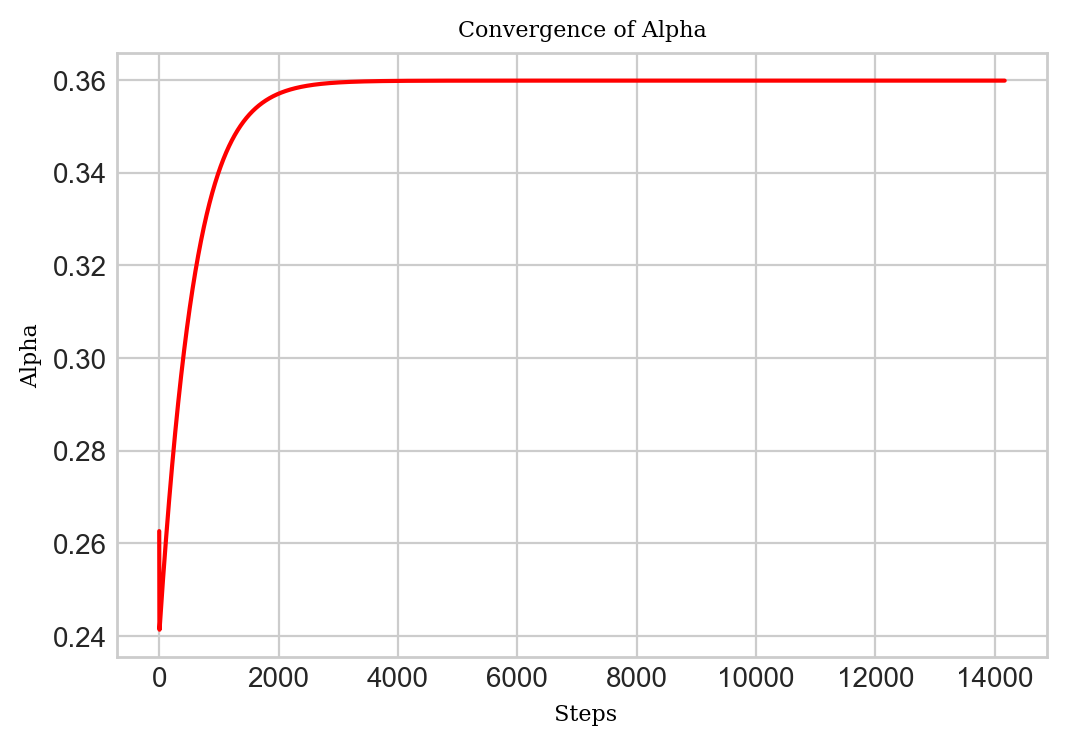

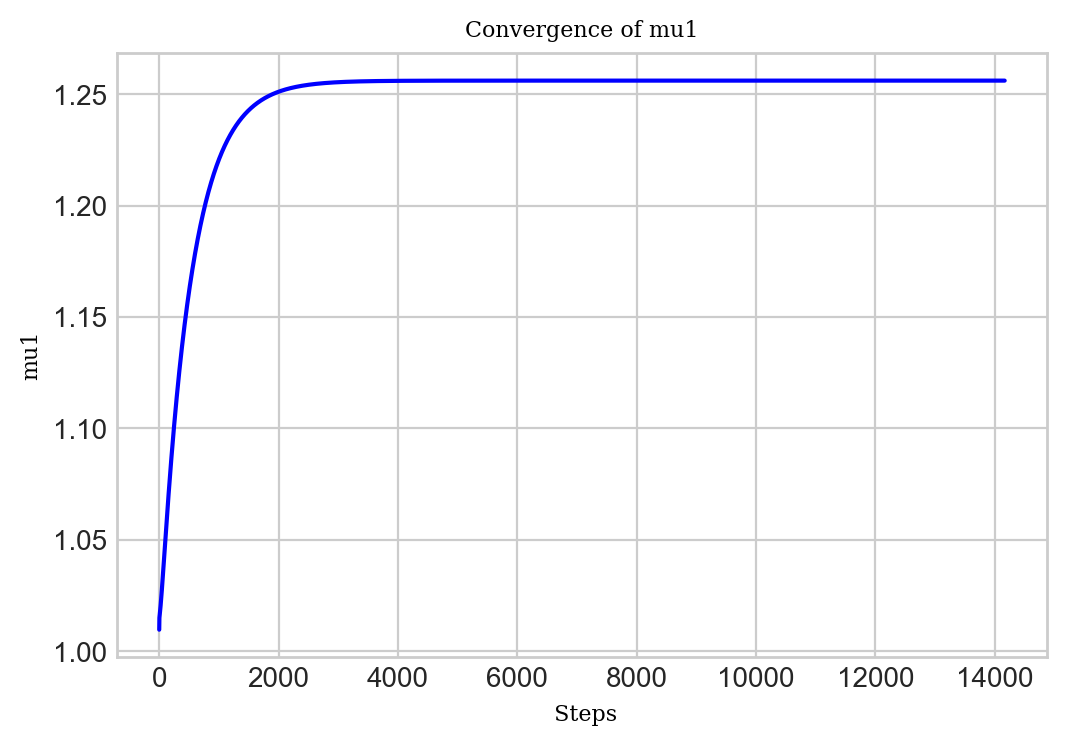

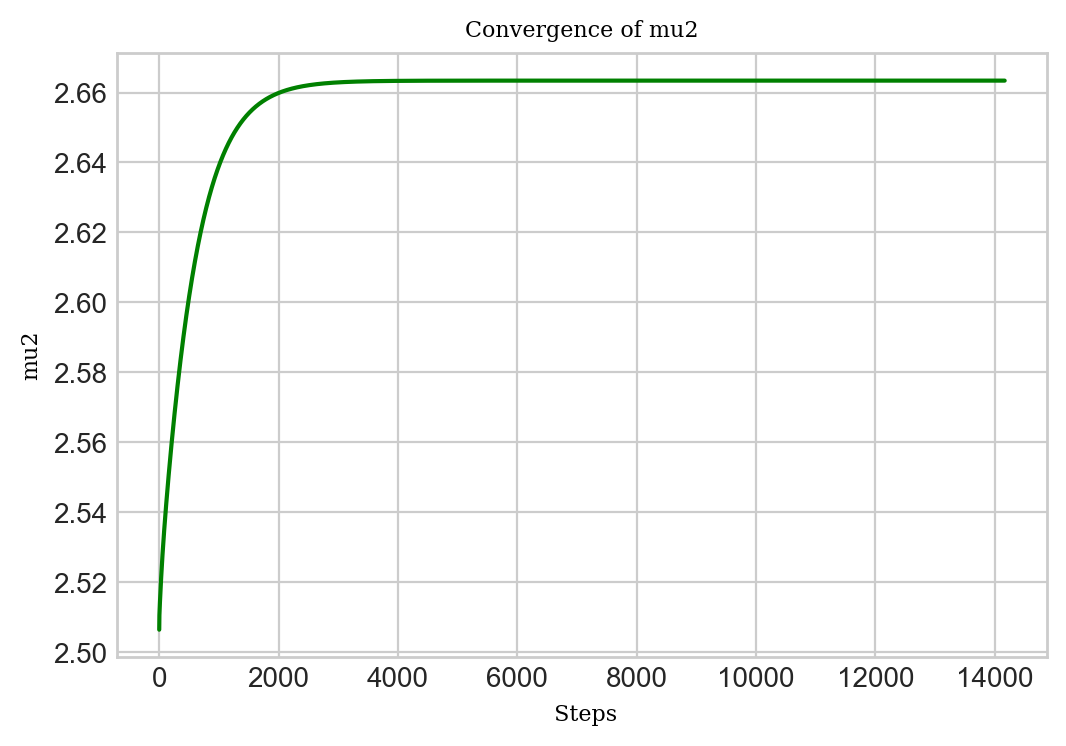

In [8]:
x0 = np.array([0.3, 1, 2.5])
points_sdm = gradient_ascent(x0, rate=0.0005)
graph(points_sdm.T[0], "Alpha", "red")
graph(points_sdm.T[1], "mu1", "blue")
graph(points_sdm.T[2], "mu2", "green")

The estimate of alpha = 9.807910831424227.
The estimate of mu1 = -33.02996582114541.
The estimate of mu2 = 1.8261506756944084.
Total step size = 87.


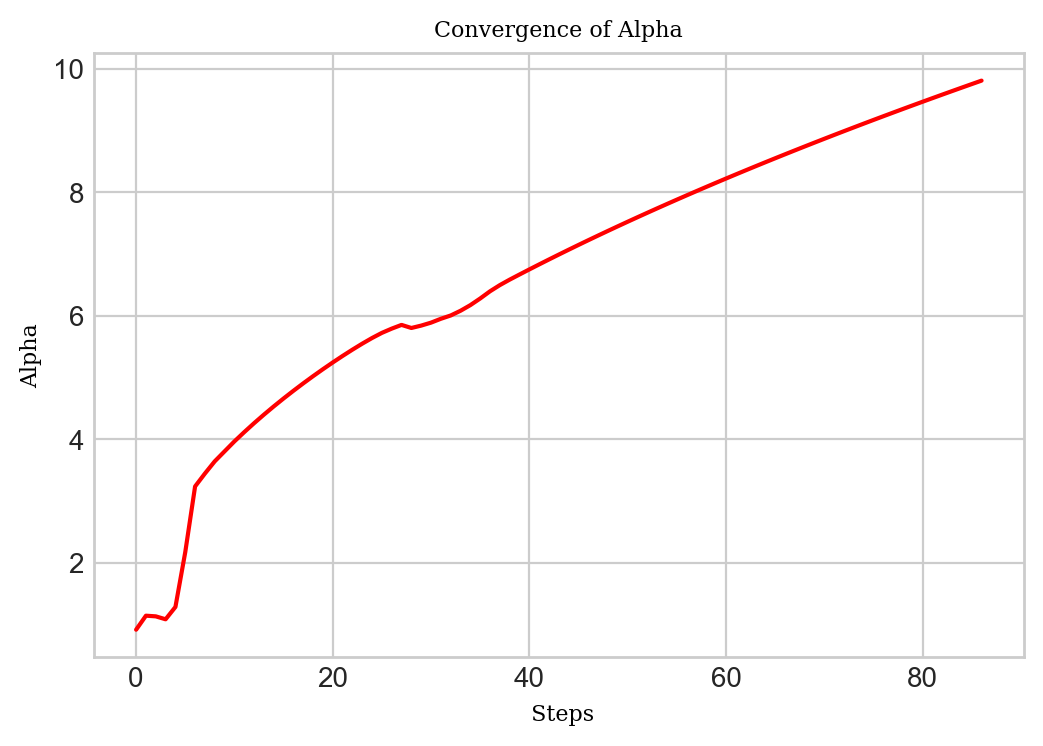

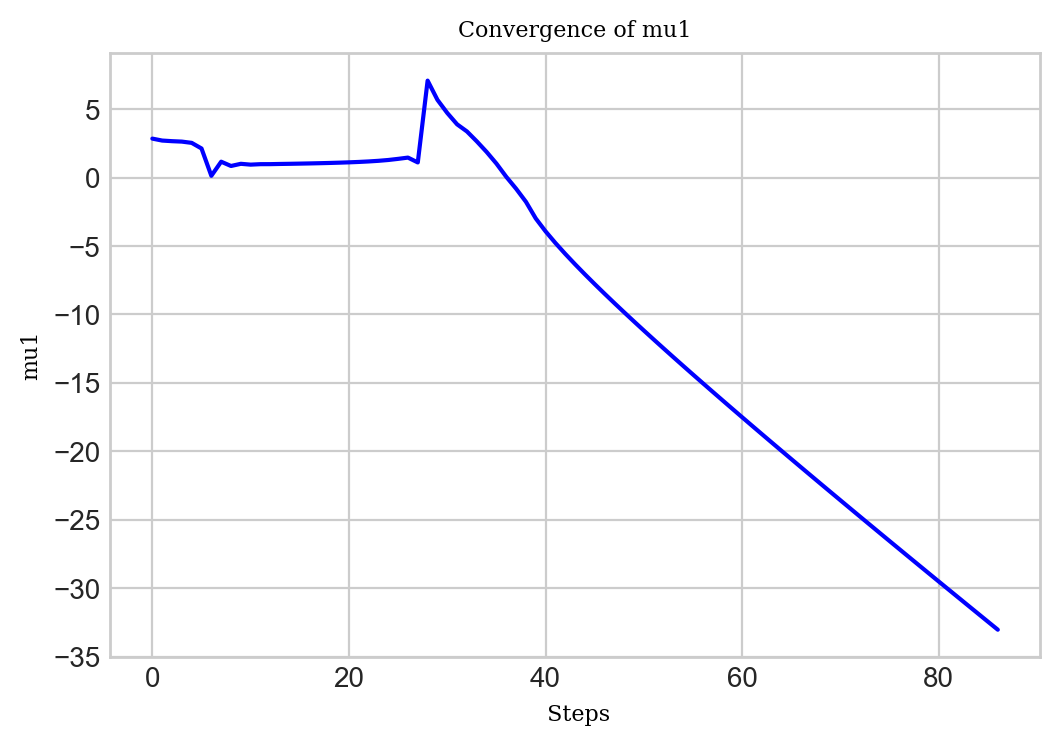

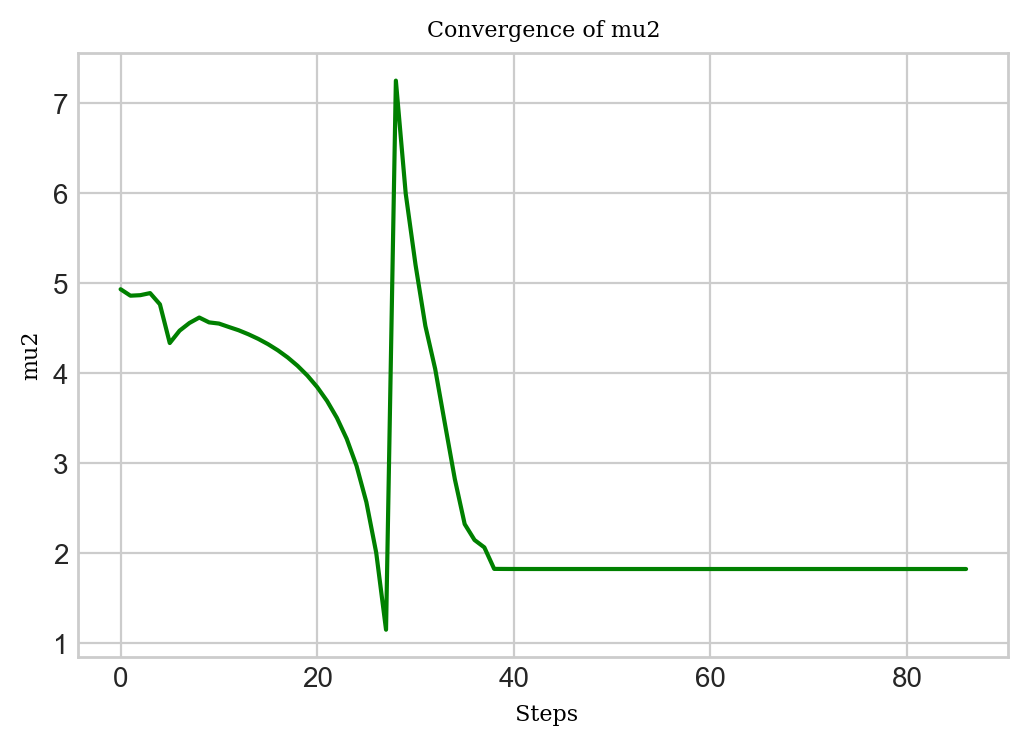

In [9]:
x1 = np.array([0.5, 3, 5])
points_sdm1 = gradient_ascent(x1, rate=0.0005)
graph(points_sdm1.T[0], "Alpha", "red")
graph(points_sdm1.T[1], "mu1", "blue")
graph(points_sdm1.T[2], "mu2", "green")

The estimate of alpha = -7.864836545730266.
The estimate of mu1 = -43.09873415566129.
The estimate of mu2 = -9.764481736822933.
Total step size = 79.


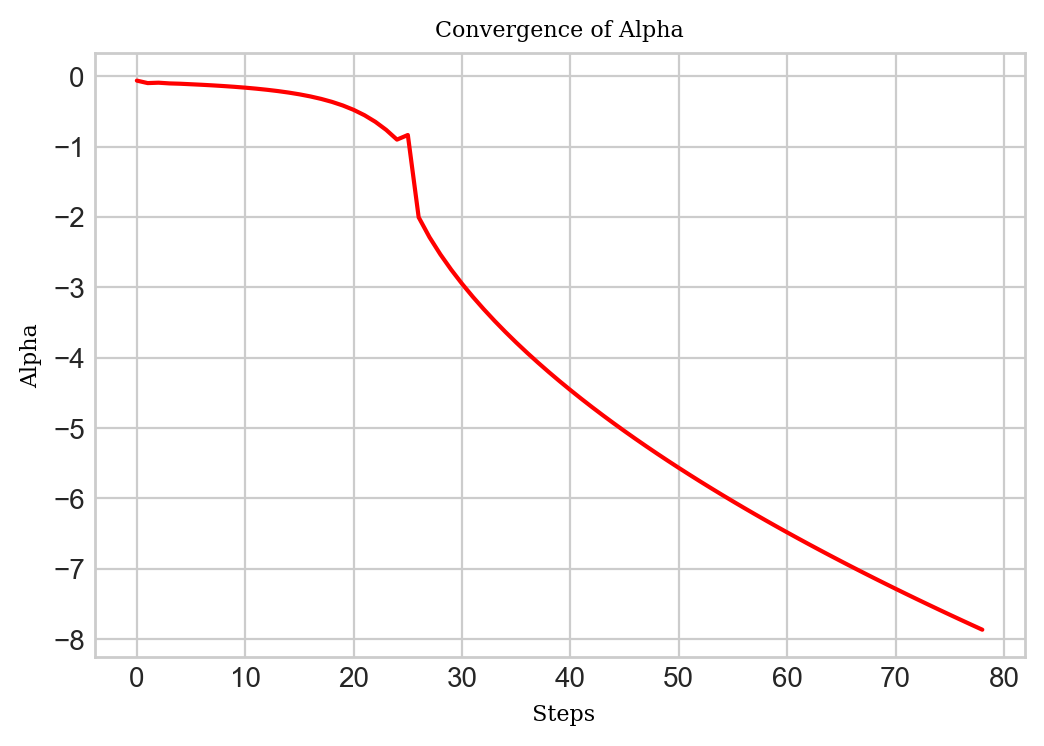

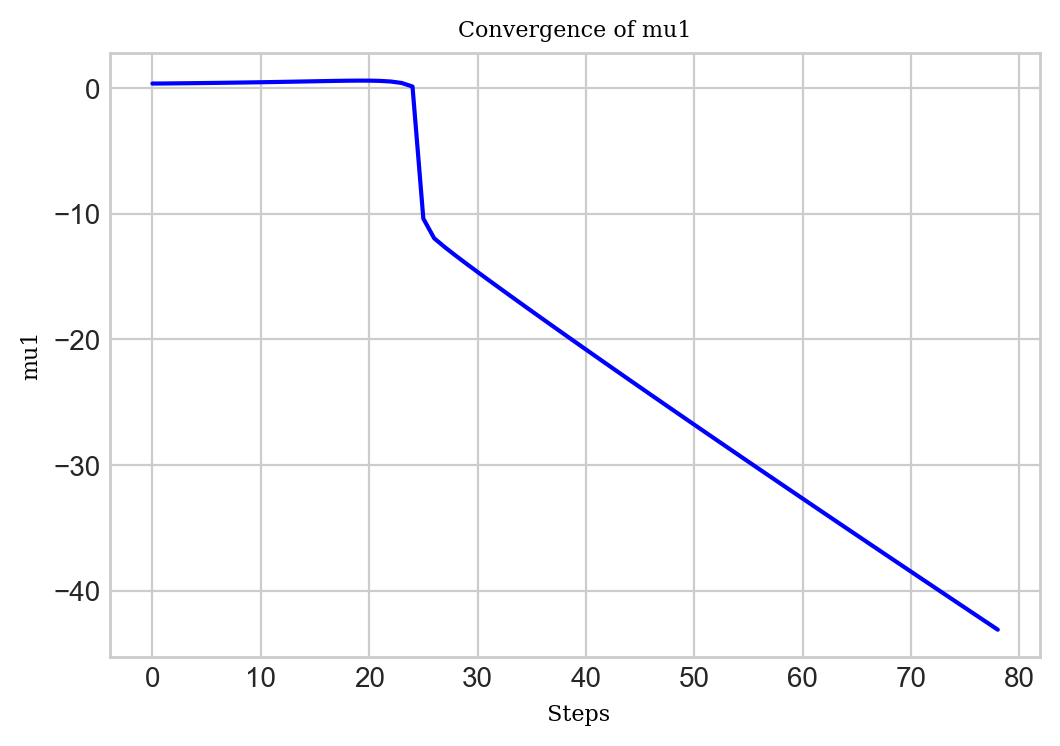

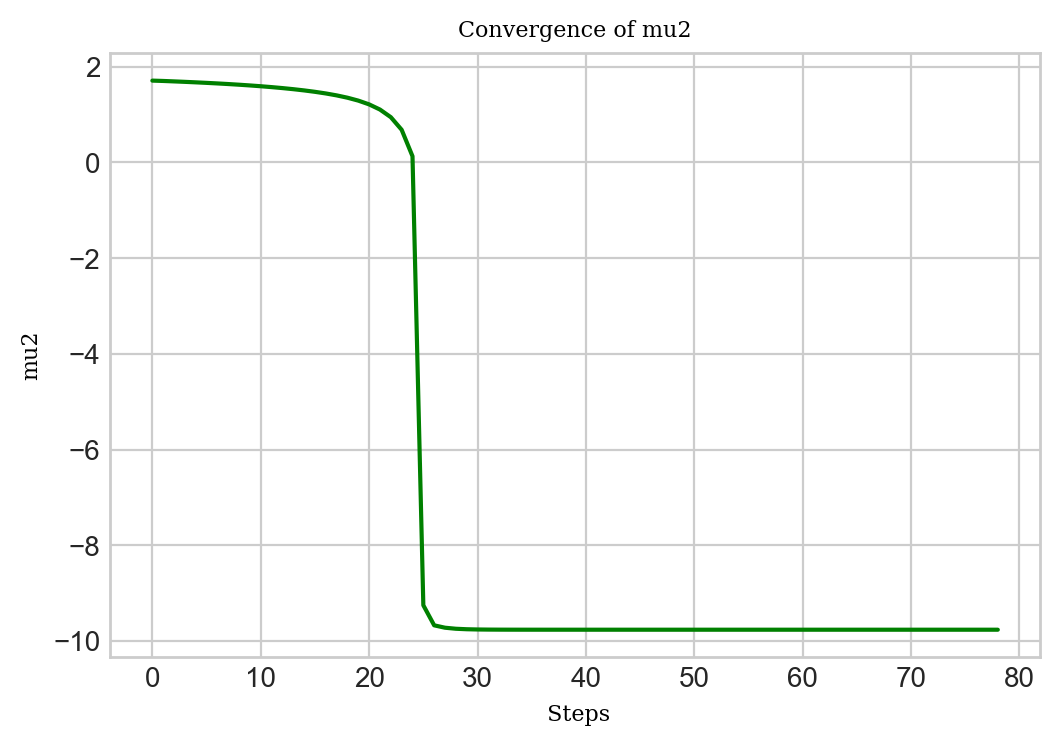

In [10]:
x2 = np.array([0.3, 0.3, 1.6])
points_sdm2 = gradient_ascent(x2, rate=0.0005)
graph(points_sdm2.T[0], "Alpha", "red")
graph(points_sdm2.T[1], "mu1", "blue")
graph(points_sdm2.T[2], "mu2", "green")

##### Considering various starting point, it was found that the Gradient ascent function is converging at some other local maxima point. Hence starting point of 0.3, 1 and 2.5 considered best for the convergence. 

## Problem 3

Implement the EM algorithm approach detailed in Question 11 to fit the parameter $\alpha$, $\mu_1$ and $\mu_2$. Compare the number of steps and the computation time of the EM algorithm to the gradient ascent method you used in Problem 2.

### Answer 3
$z_i(\theta) = \frac{\alpha e^{-\mu_1}\mu_1^i}{\alpha e^{-\mu_1}{\mu_1^i}+ (1-\alpha)e^{-\mu_2}{\mu_2^i}}$

$\alpha_{m+1} = \frac{\sum_i n_iz_i(\theta_m)}{\sum_i n_i}$

$\mu_{m+1, 1} = \frac{\sum_i n_i i z_i(\theta_m)}{\sum_i n_i z_i(\theta_m)} $

$\mu_{m+1, 2} = \frac{\sum_i n_i i [1-z_i(\theta_m)]}{\sum_i n_i [1-z_i(\theta_m)]} $

In [11]:
def z(x0,i):
    """Function to calculate Zi"""
    alpha, mu1, mu2  = x0[0], x0[1], x0[2]    
    num = alpha* np.exp(-mu1)*mu1**i
    denom = alpha* np.exp(-mu1)*mu1**i + (1-alpha)*np.exp(-mu2)*mu2**i
    z = num/denom
    return z

def next_itr(ni,i, zi):
    """Function to calculate alpha, mu1 and mu2"""
    num_alpha = sum(np.array(ni)*np.array(zi))  
    denom_alpha = sum(ni)
    alpha = num_alpha/denom_alpha
    
    num_mu1 = sum(ni*i*zi)
    denom_mu1 = sum(ni*zi)
    mu1 = num_mu1/denom_mu1
    
    num_mu2 = sum(ni*i*(1-zi))
    denom_mu2 = sum(ni*(1-zi))
    mu2 = num_mu2/denom_mu2
    
    return np.array([alpha, mu1, mu2])

In [15]:
def expectation_max(x0):
    """function for Expectation maximization iteration"""
    d =[100,100,100]
    z_i = z(x0, deaths)
    count = 0
    new_point =[]
    while d[0] and d[1] and d[2] > 0:
        x = next_itr(freq, deaths, z_i)
        new_point.append(x)
        z_i = z(x, deaths)
        d = abs(x - next_itr(freq, deaths, z_i))
        count += 1
    print("The estimate of alpha = " + str(x[0]) +".");
    print("The estimate of mu1 = " + str(x[1]) +".");
    print("The estimate of mu2 = " + str(x[2])+ ".");
    print("Total step size = " + str(count) +".");
    return new_point

In [13]:
points = expectation_max(x0)

The estimate of alpha = 0.359885396984772.
The estimate of mu1 = 1.2560951012240549.
The estimate of mu2 = 2.6634043566322734.
Total step size = 6182.


In [17]:
%%timeit
expectation_max(x0)

363 ms ± 17.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%%timeit
gradient_ascent(x0, rate=0.0005)

715 ms ± 36.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


##### The total number of steps required to converge in Gradient Ascent method is 14169, however, for the EM alogrithm, it required only 6182 steps. Run time for the Gradient Ascent method is 715 ms which almost twice of the runtime of EL Algorithm which is 363 ms. Hence EM method requires less time to converge. 